## Exoplanet Analysis

In [29]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Load dataset
df = pd.read_csv('exoplanet nasa.csv')
# Preview dataset
df_clean = df.dropna()
df.head(10)



,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity


In [31]:
# Summary Stats
print("Shape of the dataset" , df.shape)
print(df.describe())
print("Null values:\n",df.isnull().sum())

Shape of the dataset (5250, 13)
           distance  stellar_magnitude  discovery_year  mass_multiplier  \
count   5233.000000        5089.000000     5250.000000      5227.000000   
mean    2167.168737          12.683738     2015.732190         6.434812   
std     3245.522087           3.107571        4.307336        12.972727   
min        4.000000           0.872000     1992.000000         0.020000   
25%      389.000000          10.939000     2014.000000         1.804000   
50%     1371.000000          13.543000     2016.000000         4.170140   
75%     2779.000000          15.021000     2018.000000         8.000000   
max    27727.000000          44.610000     2023.000000       752.000000   

       radius_multiplier  orbital_radius  orbital_period  eccentricity  
count        5233.000000     4961.000000    5.250000e+03   5250.000000  
mean            1.015121        6.962942    4.791509e+02      0.063568  
std             0.603479      138.673600    1.680445e+04      0.141424  


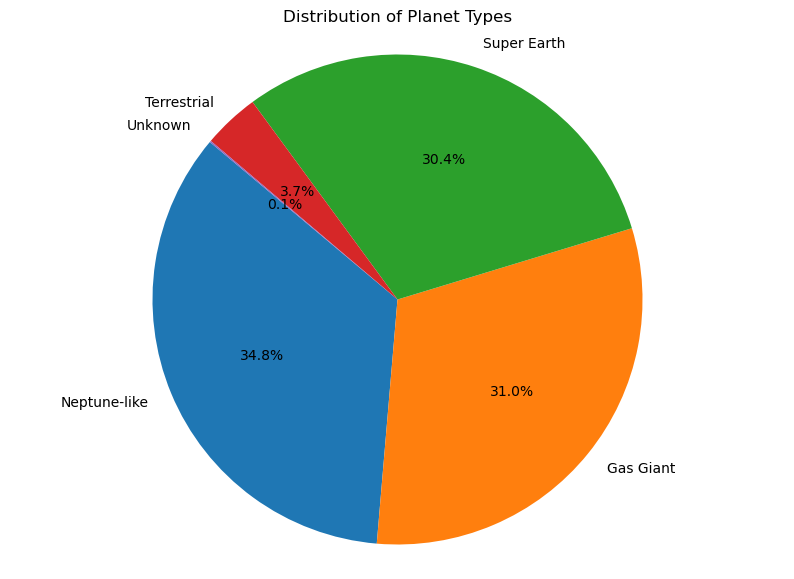

In [33]:

# Count the occurrences of each planet type
planet_type_counts = df['planet_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(planet_type_counts, labels=planet_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Planet Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


### Countplot of discoveries per year by detection method

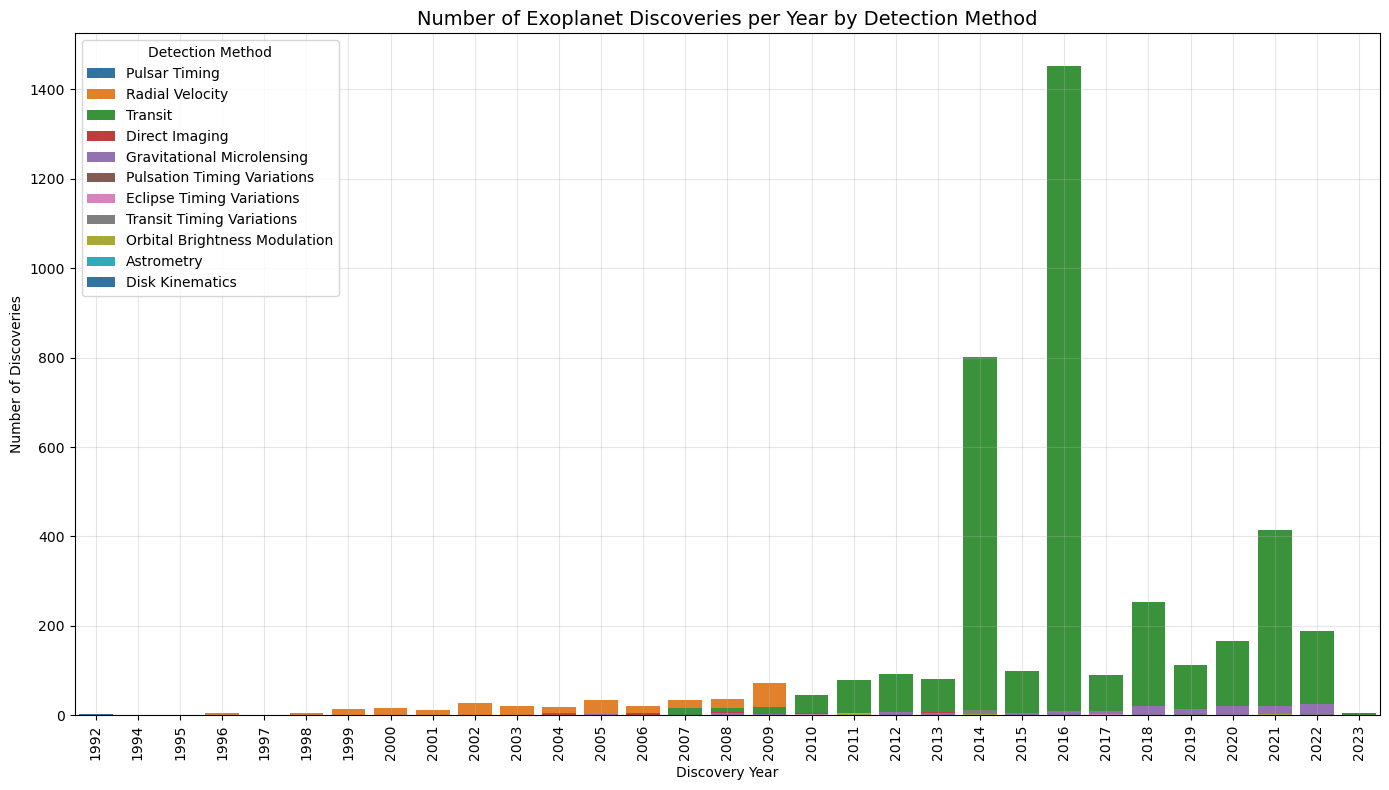

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="discovery_year", hue="detection_method", 
              palette="tab10", dodge=False)
plt.xticks(rotation=90)
plt.title("Number of Exoplanet Discoveries per Year by Detection Method", fontsize=14)
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")
plt.legend(loc='upper left', title='Detection Method')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### Insights:
•	There is an upward trend with 2014 and 2016 having spikes 
•	Radial velocity was the most common method before 2010
•	Transit has been the most common method since then, being responsible for an overwhelming majority of discoveri
s 
•	Gravitational microlensing seems to be the second most used method currently




### Stellar magnitude vs Orbital radius by Detection method

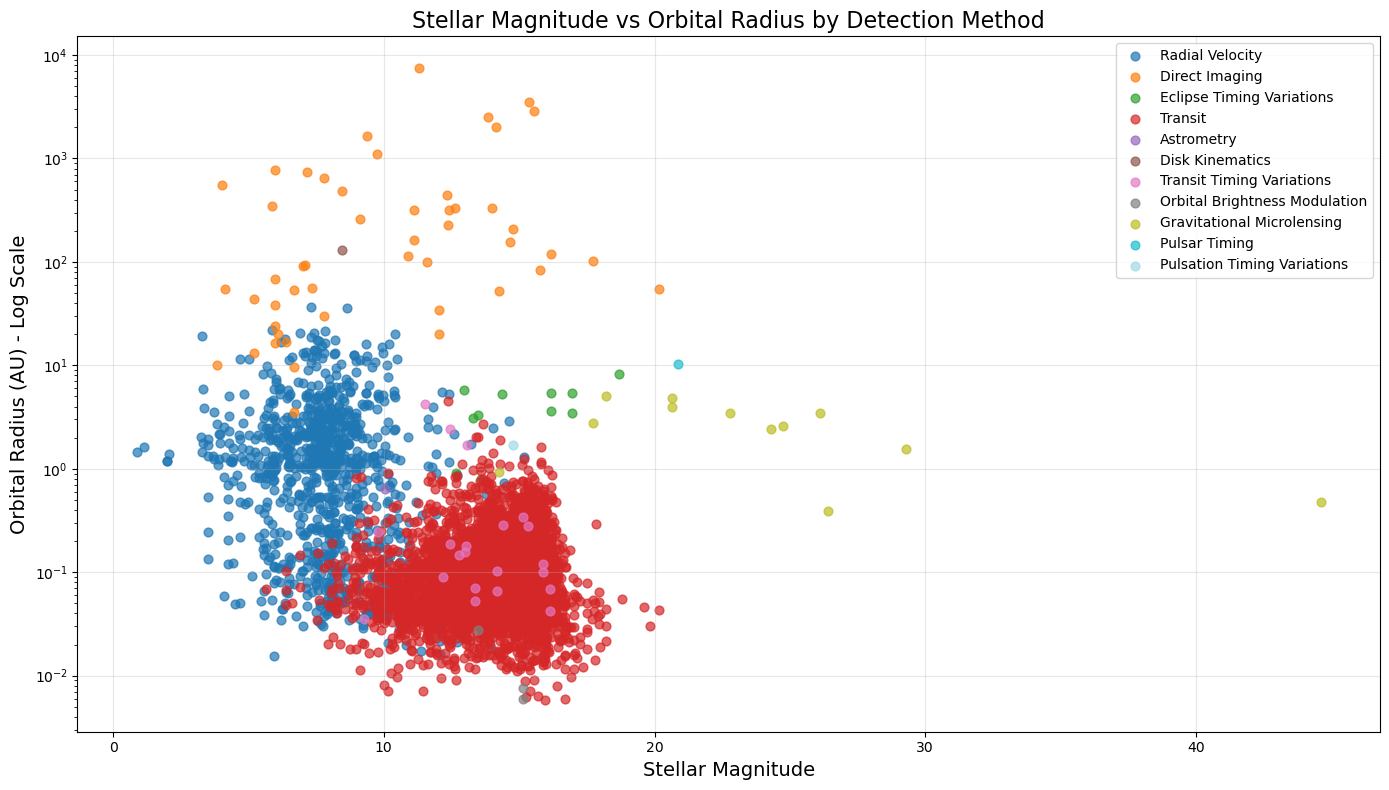

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))

methods = df_clean['detection_method'].dropna().unique()  # safer to drop NaNs
colors = plt.cm.tab20(np.linspace(0, 1, len(methods)))  # More distinct colors

for i, method in enumerate(methods):
    method_data = df_clean[df_clean['detection_method'] == method]  # use df_clean consistently
    plt.scatter(
        method_data['stellar_magnitude'], 
        method_data['orbital_radius'], 
        alpha=0.7, 
        s=40, 
        color=colors[i], 
        label=method
    )

plt.yscale('log')
plt.xlabel('Stellar Magnitude', fontsize=14)
plt.ylabel('Orbital Radius (AU) - Log Scale', fontsize=14)
plt.title('Stellar Magnitude vs Orbital Radius by Detection Method', fontsize=16)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##### Insights :
•	The two major detection methods are Transit and Radial Velocity
•	Transit is more common for exoplanets with a low orbital radius and high stellar magnitude (fainter but closer to their stars)
•	Radial velocity is more common for exoplanets with a high orbital radius and lower stellar magnitude (brighter but further from their stars)
•	Direct Imaging was the most prevalent detection method for exoplanets that were the furthest from their stars 
•	Gravitational microlensing was the most prevalent detection method for the faintest exoplanets 
•	Eclipse Timing Variation was used only for exoplanets with a Stellar Magnitude of 10-20 and and Orbital Radius of 1-10 AU 



### Orbital distribution by planet type

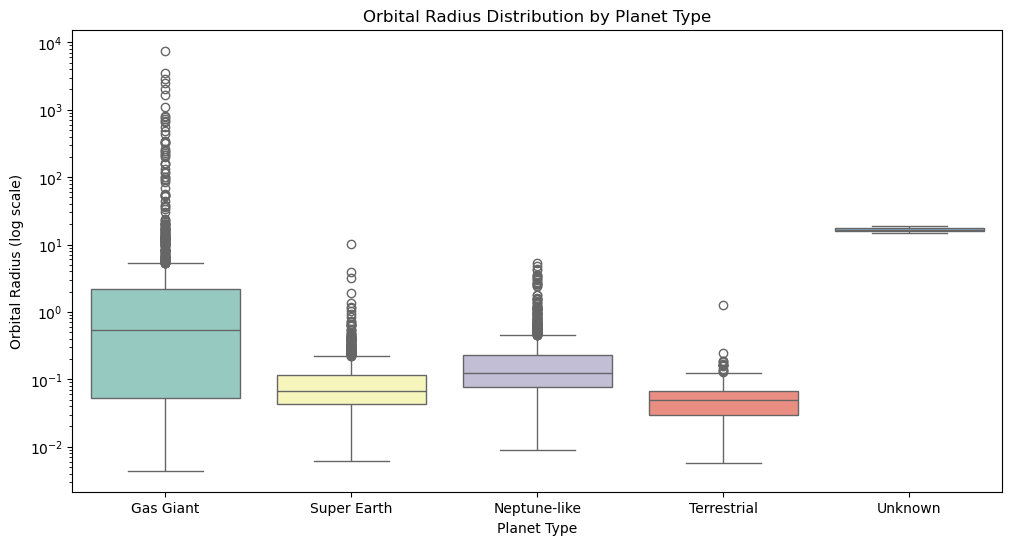

In [75]:
plt.figure(figsize=(12,6))
df_orbital_radius = df.dropna(subset=["orbital_radius", "planet_type"])
sns.boxplot(data=df_orbital_radius, x="planet_type", y="orbital_radius", palette="Set3", hue="planet_type",legend=False)
plt.yscale("log")  # Log scale for better visualization
plt.title("Orbital Radius Distribution by Planet Type")
plt.xlabel("Planet Type")
plt.ylabel("Orbital Radius (log scale)")
plt.show()


##### Insights: 
•	Gas Giants show the widest spread of orbital radii but are overall further away from their stars compared to other known types
•	Super Earths and Terrestials are found closest to their stars (similar to our solar system)
•	Unknowns are the furthest from their stars



In [79]:
import numpy as np

# Constants (in Earth units)
MASS_JUPITER = 317.8      # Jupiter is 317.8 times Earth's mass
RADIUS_JUPITER = 11.21    # Jupiter is 11.21 times Earth's radius

# Drop rows with missing mass/radius data and make a copy
df_mass_radius = df.dropna(subset=["mass_multiplier", "radius_multiplier"]).copy()

# Convert mass to Earth masses
df_mass_radius.loc[:, "mass_earth"] = np.where(
    df_mass_radius["mass_wrt"] == "Jupiter",
    df_mass_radius["mass_multiplier"] * MASS_JUPITER,
    df_mass_radius["mass_multiplier"]
)

# Convert radius to Earth radii
df_mass_radius.loc[:, "radius_earth"] = np.where(
    df_mass_radius["radius_wrt"] == "Jupiter",
    df_mass_radius["radius_multiplier"] * RADIUS_JUPITER,
    df_mass_radius["radius_multiplier"]
)

# Compute density (relative to Earth)
# Density ∝ mass / volume (volume ∝ radius^3)
df_mass_radius.loc[:, "density_relative"] = (
    df_mass_radius["mass_earth"] / (df_mass_radius["radius_earth"] ** 3)
)

df_mass_radius.head()


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,mass_earth,radius_earth,density_relative
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,6165.320000,12.1068,3.474302
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,4684.372000,12.2189,2.567764
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,1525.440000,12.8915,0.712008
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,2586.513818,12.5552,1.306905
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,565.684000,13.4520,0.232388


In [45]:
import numpy as np

# Make a copy with relevant columns
df_mass_orbit = df[['orbital_period', 'mass_multiplier', 'mass_wrt', 'planet_type']].copy()

# Drop rows with missing values
df_mass_orbit = df_mass_orbit.dropna(subset=['orbital_period', 'mass_multiplier'])

# Convert masses to Earth masses
# 1 Jupiter mass = 317.8 Earth masses
df_mass_orbit['mass_earth'] = np.where(
    df_mass_orbit['mass_wrt'] == 'Jupiter',
    df_mass_orbit['mass_multiplier'] * 317.8,
    df_mass_orbit['mass_multiplier']  # already in Earth masses if not Jupiter
)

# Final dataframe
df_mass_orbit = df_mass_orbit[['orbital_period', 'mass_earth', 'planet_type']]


#### Density distribution by planet type

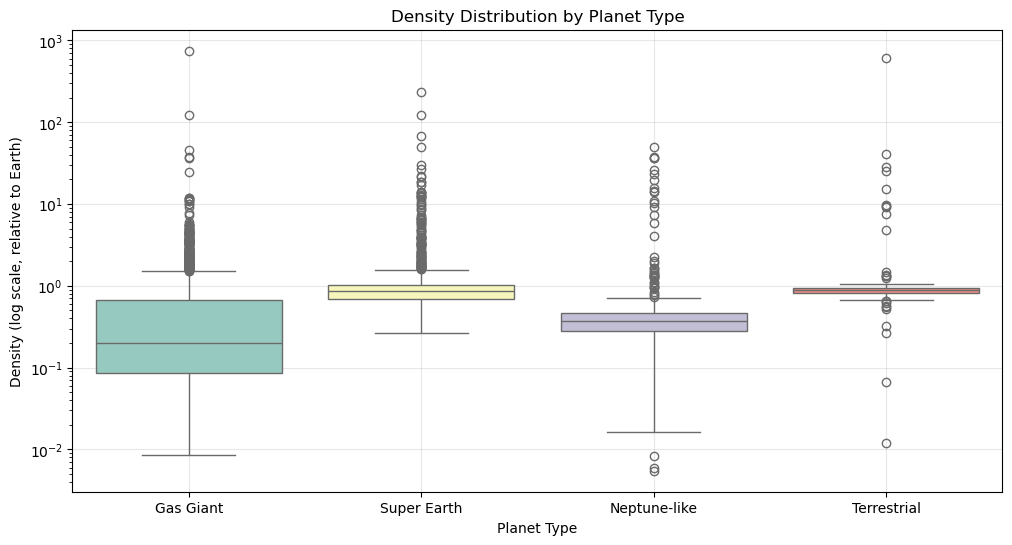

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_mass_radius, x="planet_type", y="density_relative", palette="Set3",hue="planet_type",legend=False)
plt.yscale("log")
plt.title("Density Distribution by Planet Type")
plt.xlabel("Planet Type")
plt.ylabel("Density (log scale, relative to Earth)")
plt.grid(True, alpha=0.3)
plt.show()


##### Inisights : Density in order - Gas Giant < Super Earth < Neptune-like < Terrestial

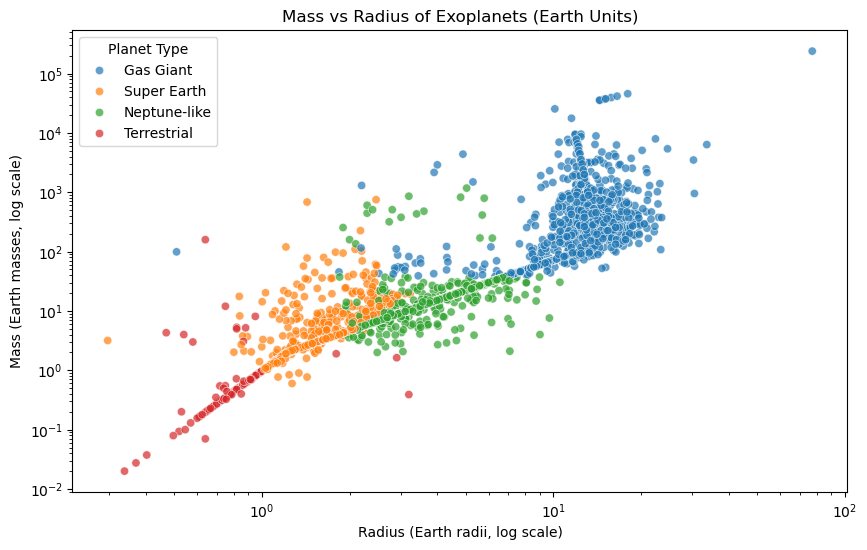

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_mass_radius, x="radius_earth", y="mass_earth", hue="planet_type", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.title("Mass vs Radius of Exoplanets (Earth Units)")
plt.xlabel("Radius (Earth radii, log scale)")
plt.ylabel("Mass (Earth masses, log scale)")
plt.legend(title="Planet Type", loc='upper left')
plt.show()


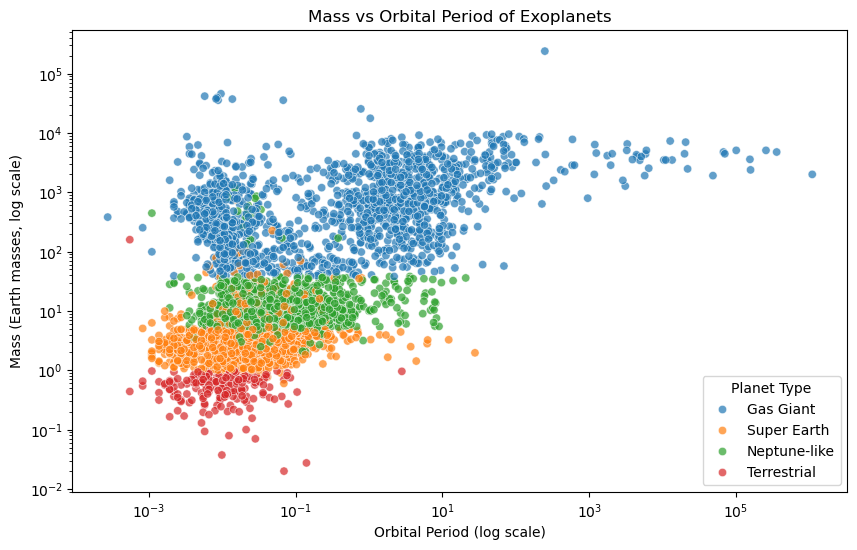

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_mass_orbit, 
    x="orbital_period", 
    y="mass_earth", 
    hue="planet_type", 
    alpha=0.7
)
plt.xscale("log")
plt.yscale("log")
plt.title("Mass vs Orbital Period of Exoplanets")
plt.xlabel("Orbital Period (log scale)")
plt.ylabel("Mass (Earth masses, log scale)")
plt.legend(title="Planet Type", loc='lower right')
plt.show()


### Clustering the exoplanets based on orbital radius and mass 

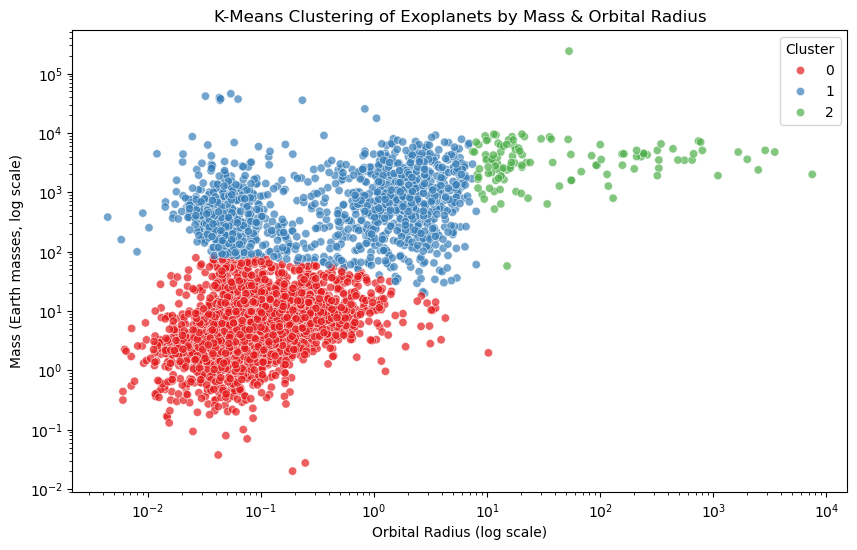

In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MASS_JUPITER = 317.8

# Select relevant columns and drop missing, make an explicit copy
df_cluster = df.dropna(subset=["mass_multiplier", "orbital_radius", "mass_wrt"]).copy()

# Convert mass to Earth units
df_cluster.loc[:, "mass_earth"] = np.where(
    df_cluster["mass_wrt"] == "Jupiter",
    df_cluster["mass_multiplier"] * MASS_JUPITER,
    df_cluster["mass_multiplier"]
)

# Prepare features for clustering
X = df_cluster[["mass_earth", "orbital_radius"]]
X_log = np.log1p(X)  # log transform to handle large ranges
X_scaled = StandardScaler().fit_transform(X_log)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init specified for sklearn 1.4+
df_cluster.loc[:, "cluster"] = kmeans.fit_predict(X_scaled)

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, x="orbital_radius", y="mass_earth", hue="cluster",
    palette="Set1", alpha=0.7
)
plt.xscale("log")
plt.yscale("log")
plt.title("K-Means Clustering of Exoplanets by Mass & Orbital Radius")
plt.xlabel("Orbital Radius (log scale)")
plt.ylabel("Mass (Earth masses, log scale)")
plt.legend(title="Cluster")
plt.show()


##### Cluster 0 : Coud represent small rocky planets that are very close to their stars 
Cluster 1 : Might contain Hot Jupiters, massive planets close to their stars

Cluster 2 : Might contain Cold Giants, massive planets far from their stars


#### Stellar Magnitude vs Distance by detection method

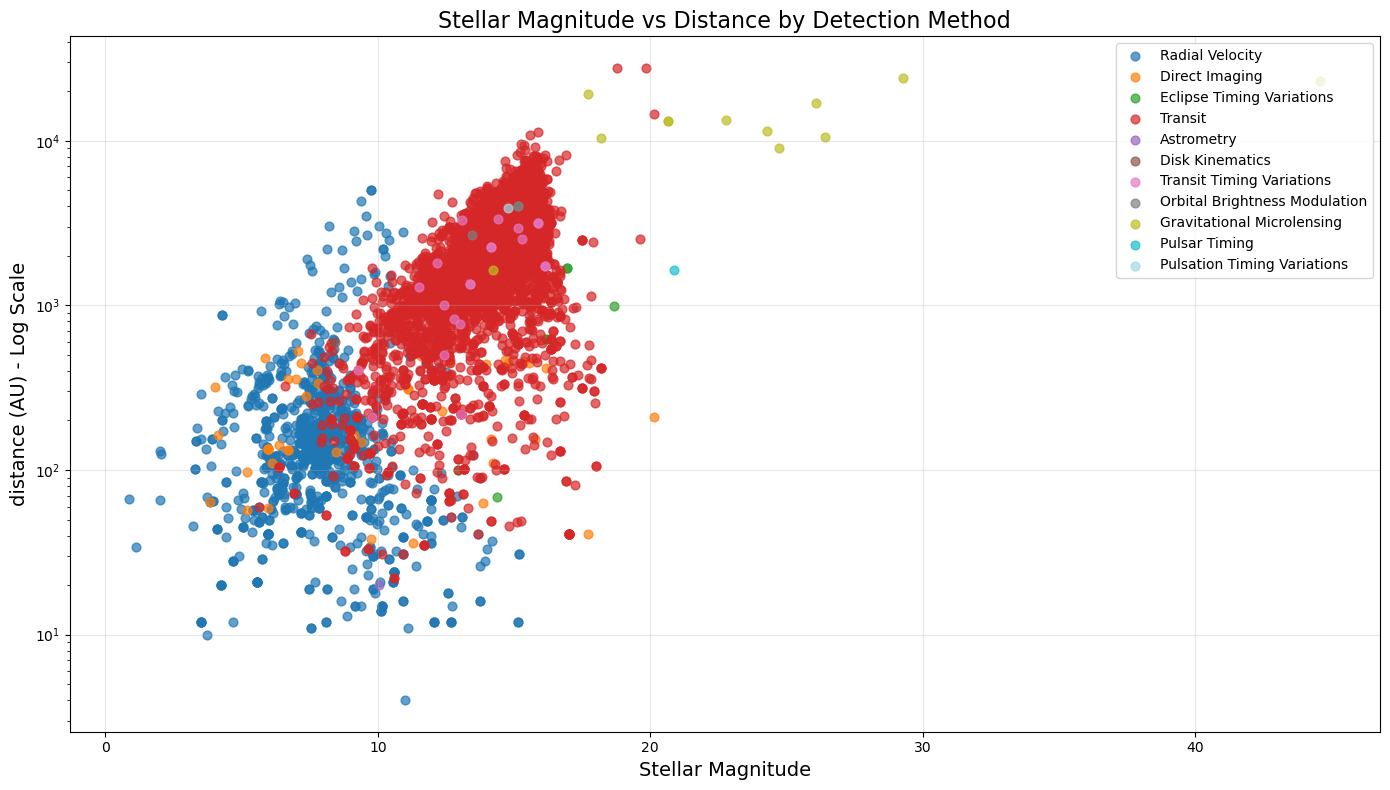

In [67]:

plt.figure(figsize=(14, 8))
methods = df_clean['detection_method'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(methods)))  

for i, method in enumerate(methods):
    method_data = df_clean[df_clean['detection_method'] == method]
    plt.scatter(method_data['stellar_magnitude'], method_data['distance'], 
                alpha=0.7, s=40, color=colors[i], label=method)

plt.yscale('log')
plt.xlabel('Stellar Magnitude', fontsize=14)
plt.ylabel('distance (AU) - Log Scale', fontsize=14)
plt.title('Stellar Magnitude vs Distance by Detection Method', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##### Insights 
•	Radial Velocity was used most for exoplanets that were bright and close to us
•	Transit was used for exoplanets that were fainter and far from us


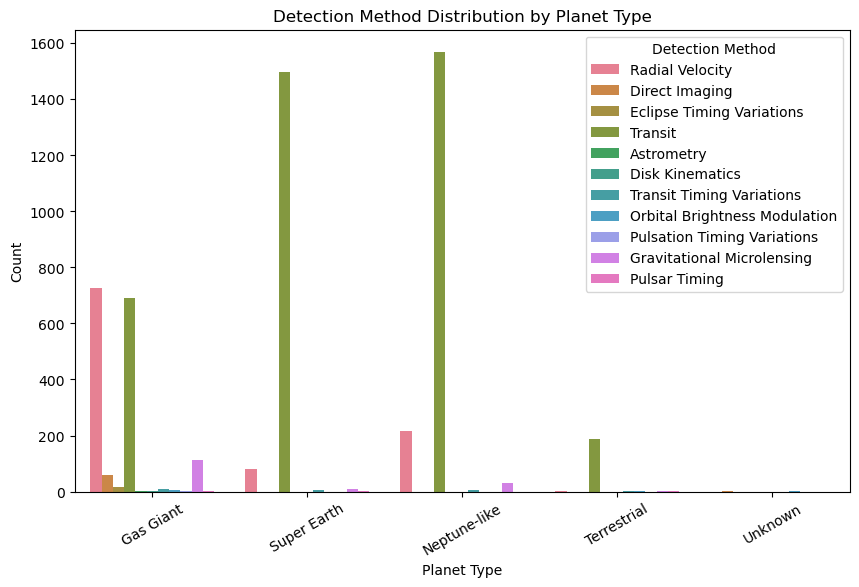

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="planet_type", hue="detection_method")
plt.title("Detection Method Distribution by Planet Type")
plt.xlabel("Planet Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Detection Method")
plt.show()


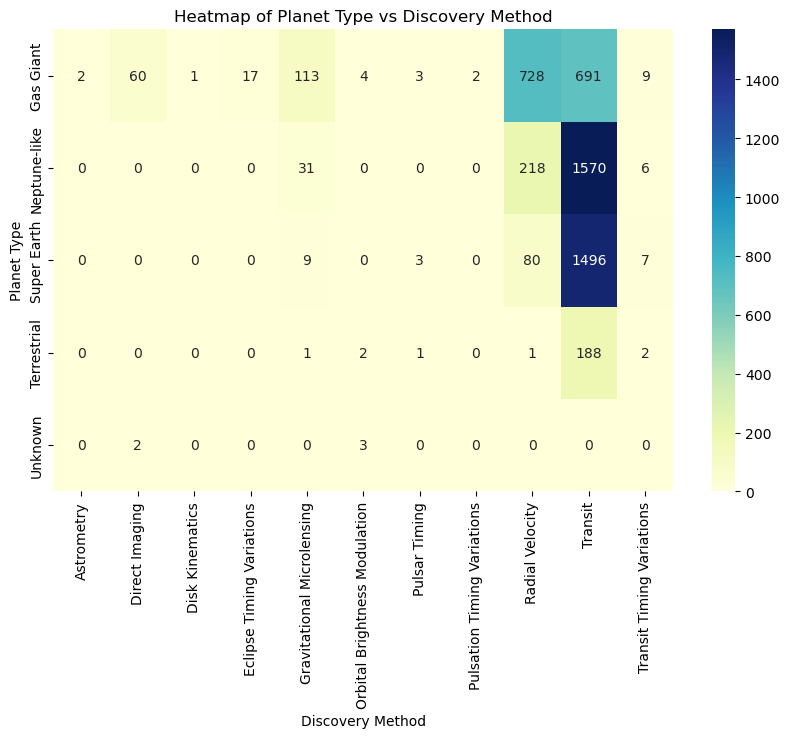

In [65]:
crosstab = pd.crosstab(df['planet_type'], df['detection_method'])
plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Heatmap of Planet Type vs Discovery Method")
plt.xlabel("Discovery Method")
plt.ylabel("Planet Type")
plt.show()
